In [2]:
import time
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import zipfile
with zipfile.ZipFile('dataset.zip') as file:
    file.extractall()

In [4]:
training_data = 'dataset/training_set'
test_data = 'dataset/test_set'

In [5]:
# Image preprocessing for training and testing data
training_set = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

In [6]:
test_set = ImageDataGenerator(rescale=1./255)

In [8]:
# Load training and testing data
training_set = training_set.flow_from_directory(
    training_data,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

Found 6362 images belonging to 2 classes.


In [10]:
test_set = test_set.flow_from_directory(
    test_data,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [11]:
#  model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\adeeb\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,094,337 (99.54 MB)

 Trainable params: 26,094,337 (99.54 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
history= model.fit(
        training_set,
        steps_per_epoch=None,
        epochs= 60,
        validation_data=test_set
)

Epoch 1/60


C:\Users\adeeb\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 105s 510ms/step - accuracy: 0.7525 - loss: 0.5038 - val_accuracy: 0.9000 - val_loss: 0.2345
Epoch 2/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 100s 497ms/step - accuracy: 0.9308 - loss: 0.1691 - val_accuracy: 0.9500 - val_loss: 0.1616
Epoch 3/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 133s 667ms/step - accuracy: 0.9472 - loss: 0.1370 - val_accuracy: 0.8150 - val_loss: 0.5710
Epoch 4/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 135s 670ms/step - accuracy: 0.9562 - loss: 0.1193 - val_accuracy: 0.9550 - val_loss: 0.1111
Epoch 5/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 172s 856ms/step - accuracy: 0.9674 - loss: 0.0917 - val_accuracy: 0.9650 - val_loss: 0.1370
Epoch 6/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 177s 880ms/step - accuracy: 0.9758 - loss: 0.0672 - val_accuracy: 0.8950 - val_loss: 0.4121
Epoch 7/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 117s 576ms/step - accuracy: 0.9780 - loss: 0.0591 - val_accuracy: 0.8950 - val_loss: 0.3298
Epoch 8/60
199/199 ━━━━━━━━━━━━━━━━━━━━ 110s 548ms/step - accuracy: 0.9817 - loss: 0.05

In [17]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_set)
print(f'Overall Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Overall Test Loss: {test_loss * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9526 - loss: 0.1463
Overall Test Accuracy: 96.00%
Overall Test Loss: 13.92%


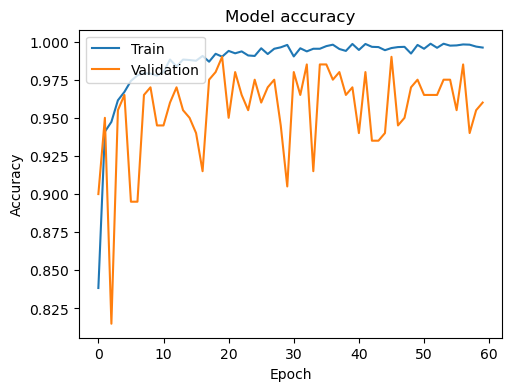

In [18]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

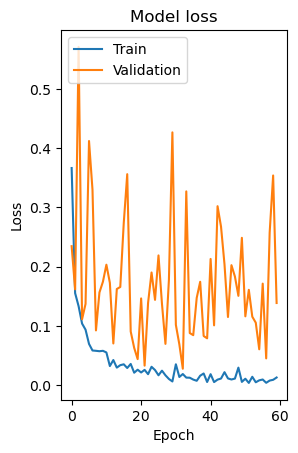

In [19]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


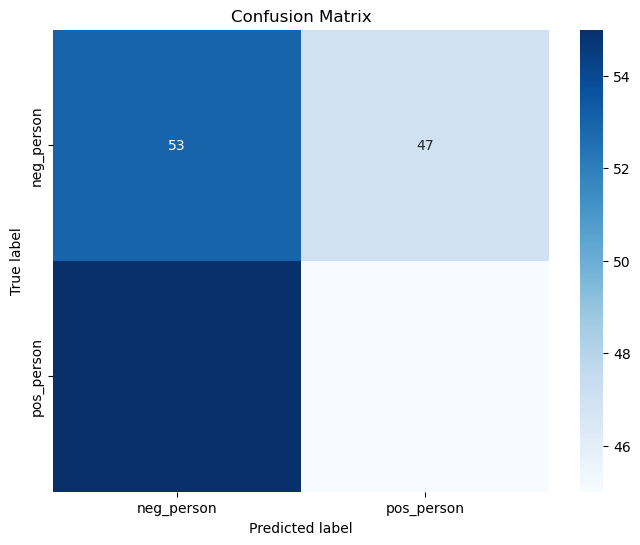

In [20]:
# Plot confusion matrix
Y_pred = model.predict(test_set)
y_pred = np.round(Y_pred).astype(int).flatten()
y_true = test_set.classes
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()